Importing the modules

In [33]:
import pandas as pd
import string

# Importing Natural Language Processing toolkit
import nltk

# Downloading the NLTK english stop words
nltk.download('stopwords')

# Downloading the NLTK sentence tokenizer
nltk.download('punkt')
nltk.download('punkt_tab')

# Downloading the NLTK POS Tagger
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Downloading the NLTK Vader Lexicon
nltk.download('vader_lexicon')

# Importing the NLTK english stop words
from nltk.corpus import stopwords

# Importing frequency distribution from NLTK
from nltk.probability import FreqDist

# Importing VADER dictionary. It is a rule-based sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer

# Importing data visualization modules
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

print("Modules are imported! :)")

Modules are imported! :)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
# Loading the customer reviews dataset
data = pd.read_csv('/content/dataset.csv')
data.head()

,product_review,product_category
0,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,Beautifully made pants and on trend with the f...,Bottoms
2,I never would have given these pants a second ...,Bottoms
3,These pants are even better in person. the onl...,Bottoms
4,The silhouette and length of this skirt and le...,Bottoms


Let's check the shape of the data frame

In [35]:
data.shape

(3376, 2)

Let's check the first `product_review`

In [36]:
data.product_review[0]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

Checking the number of reviews per product category

In [37]:
data.product_category.value_counts()

,count
product_category,
Bottoms,685
Dresses,681
Tops,680
Jackets,680
Intimate,650


In [38]:
# Clean and preprocess the reviews

data.head()

,product_review,product_category
0,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,Beautifully made pants and on trend with the f...,Bottoms
2,I never would have given these pants a second ...,Bottoms
3,These pants are even better in person. the onl...,Bottoms
4,The silhouette and length of this skirt and le...,Bottoms


Converting all the reveiews to lower case

In [39]:
data.product_review = data.product_review.str.lower()

In [40]:
data.head()

,product_review,product_category
0,"i love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person. the onl...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


Removing the punctuations

In [41]:
data.product_review = data.product_review.str.translate(str.maketrans('', '', string.punctuation))

Let's remove the punctuations from all the reviews

In [42]:
data.head()

,product_review,product_category
0,i love love love this jumpsuit its fun flirty ...,Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person the only...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


In [43]:
# Tokenize the reviews and removing the stop words

tokens = nltk.word_tokenize(data.product_review[0])
tokens

['i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'flirty',
 'and',
 'fabulous',
 'every',
 'time',
 'i',
 'wear',
 'it',
 'i',
 'get',
 'nothing',
 'but',
 'great',
 'compliments']

Let's remove the Stop Words


In [44]:
english_stopwords = stopwords.words("english")
english_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

Let's remove the stop words from the `tokens` list

In [45]:
def remove_stopwords(tokens):
    return [ t for t in tokens if t not in english_stopwords]

remove_stopwords(tokens)

['love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliments']

Let's tokenize all the reviews

In [46]:
data['product_review_tokenized'] = data.product_review.apply(nltk.word_tokenize)
data.head()

,product_review,product_category,product_review_tokenized
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt..."


Remove the stopwords from the tokenized reviews

In [47]:
def remove_stopwords(tokens):
    return [t for t in tokens if t not in english_stopwords]

data['cleaned_tokens'] = data.product_review_tokenized.apply(remove_stopwords)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering..."


Let's recreate the reviews from the cleaned tokens again

In [48]:
tokens = data.cleaned_tokens[0]
" ".join(tokens)

'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments'

In [49]:
data['product_review_cleaned'] = data.cleaned_tokens.apply(lambda x: " ".join(x))
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


In [50]:
# Exploring the tokens and product categories

data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


Let's take a look at the product categories again

In [51]:
data.product_category.value_counts()

,count
product_category,
Bottoms,685
Dresses,681
Tops,680
Jackets,680
Intimate,650


Let's combine all the tokens used in reviews for the `Tops`

In [52]:
tops_tokens = []

for x in data[data.product_category == 'Tops'].cleaned_tokens:
    tops_tokens.extend(x)

Let's find the 20 most common words in the `Tops` products' reviews

In [53]:
freq_dist = FreqDist(tops_tokens)
freq_dist.most_common(20)

[('love', 337),
 ('top', 334),
 ('wear', 233),
 ('great', 229),
 ('size', 211),
 ('color', 185),
 ('shirt', 172),
 ('fit', 167),
 ('im', 149),
 ('perfect', 146),
 ('small', 141),
 ('like', 140),
 ('soft', 136),
 ('flattering', 128),
 ('little', 120),
 ('one', 119),
 ('sweater', 118),
 ('fits', 112),
 ('bought', 111),
 ('well', 109)]

Exercise: Find the 20 most common words in the `Dresses` products' reviews

In [54]:
dresses_tokens = []

for x in data[data.product_category == 'Dresses'].cleaned_tokens:
    dresses_tokens.extend(x)


In [55]:
freq_dist_dresses = FreqDist(dresses_tokens)
freq_dist_dresses.most_common(20)

[('dress', 1062),
 ('like', 321),
 ('fabric', 254),
 ('would', 220),
 ('size', 207),
 ('fit', 207),
 ('back', 166),
 ('look', 157),
 ('really', 154),
 ('love', 152),
 ('im', 146),
 ('ordered', 146),
 ('material', 139),
 ('small', 128),
 ('looks', 119),
 ('looked', 118),
 ('much', 111),
 ('also', 106),
 ('top', 105),
 ('wear', 105)]

In [56]:
# Extracting the adjectives used in the reviews

data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


### Part of Speech Tagging


In [57]:
data.product_review[0]

'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments'

In [58]:
nltk.download('tagsets')
nltk.download('tagsets_json')

nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Package tagsets_json is already up-to-date!


In [59]:
nltk.pos_tag(data.product_review_tokenized[0])

[('i', 'NN'),
 ('love', 'VBP'),
 ('love', 'NN'),
 ('love', 'NN'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('its', 'PRP$'),
 ('fun', 'NN'),
 ('flirty', 'NN'),
 ('and', 'CC'),
 ('fabulous', 'JJ'),
 ('every', 'DT'),
 ('time', 'NN'),
 ('i', 'NN'),
 ('wear', 'VBP'),
 ('it', 'PRP'),
 ('i', 'JJ'),
 ('get', 'VBP'),
 ('nothing', 'NN'),
 ('but', 'CC'),
 ('great', 'JJ'),
 ('compliments', 'NNS')]

Let's use the POS-tagger to assign part of speech to all the tokens of all of the reviews

In [60]:
data['POS_tokens'] = data.product_review_tokenized.apply(nltk.pos_tag)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng..."


Let's extract the adjectives used in each review

In [61]:
def extract_adj(tokens):
    adjectives = []
    for x in tokens:
        if x[1] in ['JJ', 'JJR', 'JJS']:
            adjectives.append(x[0])

    return adjectives

In [62]:
data['adjectives'] = data.POS_tokens.apply(extract_adj)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens,adjectives
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]"
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]"
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]"
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]"
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi..."


Let's combine all the `adjectives` for the `Tops`.

In [63]:
adj_tops = ""
for x in data[data.product_category == 'Tops'].adjectives:
    adj_tops += " ".join(x) + " "

adj_tops

'flattering due adjustable perfect cardigan last i pale gorgeous little hte ejans i glad i white crisp clean i great perfect wear cant wrong wasnt seethrough white careful i great comfy classic quirky beautiful practical cropped boxy perfect longer camisole little thin small gorgeous unsnapped skinny true great casual flare grey back nice beautiful ordinary usual tight chest i cute plaid great local comfortable bad little dressier small black top comfortable comfortable good perfect roomy warm cute collar beautiful unique busty top small wouldve fit better adorable bib favorite small perfect soft comfortable unusual asymmetrical front visual little ive adorable i comfortable feminine great dark perfect wish happy comfortable flattering comfortable light top lovely floral great white top happy top online little i little large petite longer regular perfect give soft comfortable short much uncomfortable doesnt easier navy boxy whole cute more fabric i super read same specific petite weigh

Let's visualize the adjectives using a wordcloud

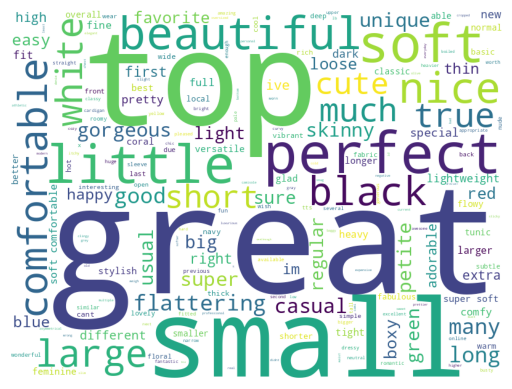

In [64]:
word_cloud = WordCloud(width = 800, height = 600, background_color = 'white').generate(adj_tops)

plt.imshow(word_cloud)
plt.axis('off')
plt.show()


Let's write a python method that gets a product category name and combine the adjectives used in the reviews related to the input category and visualize them using a word cloud.

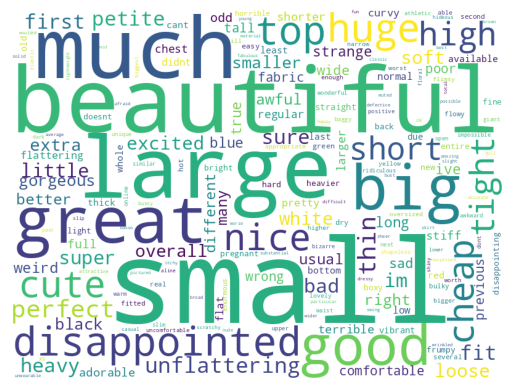

In [65]:
def visualize(category_name):
    adjectives = ""

    for x in data[data.product_category == category_name].adjectives:
        adjectives += " ".join(x) + " "

    word_cloud = WordCloud(width = 800, height = 600, background_color = 'white').generate(adjectives)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()


visualize('Dresses')


### Finding the sentiment of each review

In [66]:
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens,adjectives
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]"
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]"
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]"
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]"
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi..."


Let's find the sentiment of the reviews

In [67]:
sent = SentimentIntensityAnalyzer()

review = data.product_review_cleaned[0]
print(review)
scores = sent.polarity_scores(review)
print(scores)

love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments
{'neg': 0.171, 'neu': 0.185, 'pos': 0.644, 'compound': 0.9464}


### Sentiment scores:

Now let's create a method to find the sentiment of a review using the compound score

In [68]:
def polarity_score(review):
    # Initilizing the Sentiment Analyzer
    sent = SentimentIntensityAnalyzer()

    # Extracting the sentiment polarity scores of a review
    scores = sent.polarity_scores(review)

    # Getting the compound score
    compound = scores['compound']

    if compound > 0.05:
        return "positive"
    elif compound < -0.05:
        return "negative"
    else:
        return "neutral"

polarity_score("I hate this lovely icecream very much. It tastes good quite rarely.") # Misclassifies this

'positive'

Let's label all the reviews with sentiment

In [69]:
data['sentiment'] = data.product_review_cleaned.apply(polarity_score)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens,adjectives,sentiment
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]",positive
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]",positive
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]",positive
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]",positive
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi...",positive


In [70]:
df = data.groupby(["product_category", "sentiment"]).size().reset_index(name = "counts")
df

,product_category,sentiment,counts
0,Bottoms,negative,6
1,Bottoms,neutral,2
2,Bottoms,positive,677
3,Dresses,negative,95
4,Dresses,neutral,23
5,Dresses,positive,563
6,Intimate,negative,26
7,Intimate,neutral,14
8,Intimate,positive,610
9,Jackets,negative,4


In [71]:
px.bar(df, x = "product_category", y ="counts", color = "sentiment", barmode = 'group')